In [7]:
# Importing necessary libraries and loading the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Importing necessary machine learning libraries and spliting the data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

import warnings
warnings.filterwarnings('ignore')
# Loading the dataset
data = pd.read_csv('C:\\Users\\DELL\\Downloads\\archive\\spotify2023.csv', encoding = "ISO-8859-1")
# Filtering the rows where 'track_title' is not equal to "Love Grows (Where My Rosemary Goes)"
data = data[data['track_name'] != "Love Grows (Where My Rosemary Goes)"]

# Reset the index after removing rows
data.reset_index(drop=True, inplace=True)

# Data Exploration

Before we dive into the analysis, it's crucial to understand our data. Let's take a quick look at the first few rows and check for missing values.

In [8]:
# Displaying the first few rows of the dataset
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [9]:
# Checking for missing values
data.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

# Data Visualization

They say a picture is worth a thousand words. Let's create some visually appealing plots to better understand our dataset.

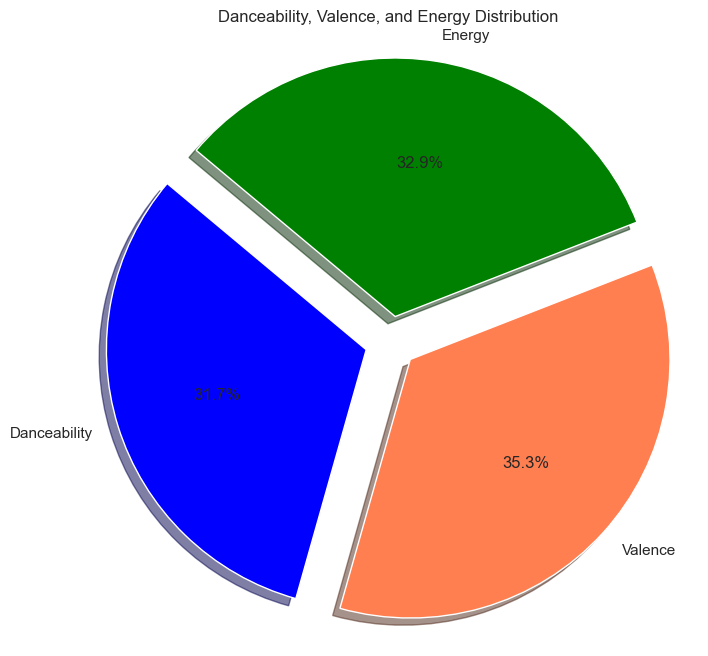

In [22]:
plt.figure(figsize=(8, 8))
labels = ['Danceability', 'Valence', 'Energy']
sizes = [data['danceability_%'].iloc[0], data['valence_%'].iloc[0], data['energy_%'].iloc[0]]
colors = ['blue', 'coral', 'green']
explode = (0.1, 0.1, 0.1)  # explode the 1st slice (Danceability)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Danceability, Valence, and Energy Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

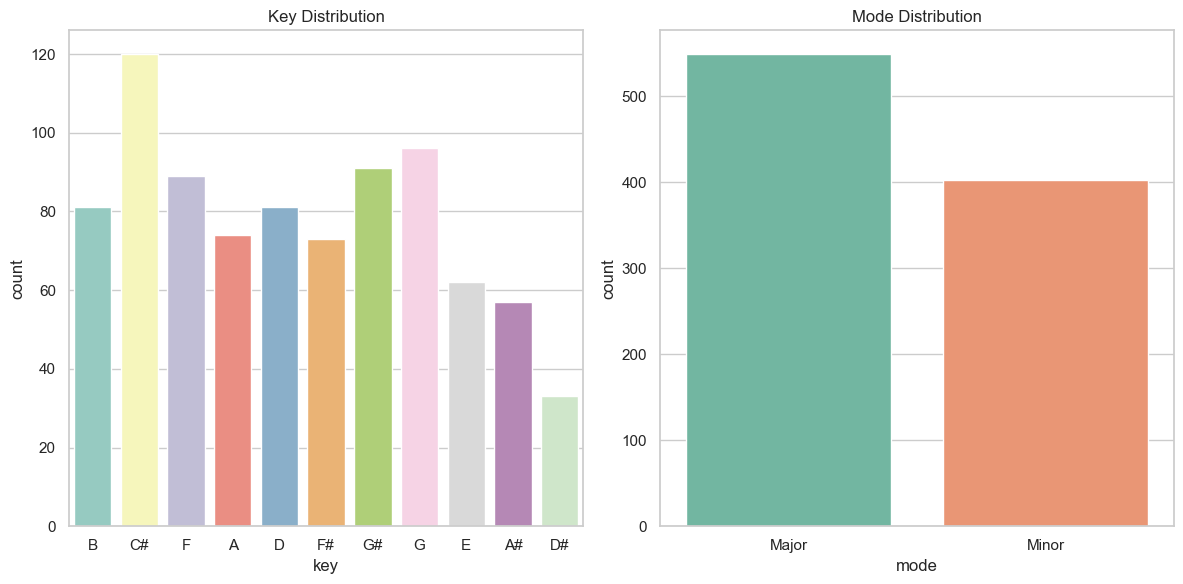

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='key', data=data, palette='Set3')
plt.title('Key Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='mode', data=data, palette='Set2')
plt.title('Mode Distribution')

plt.tight_layout()
plt.show()

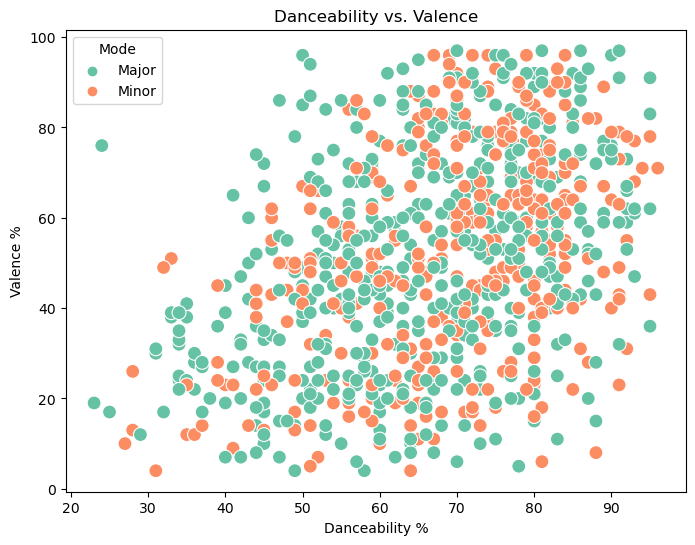

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='danceability_%', y='valence_%', data=data, hue='mode', palette='Set2', s=100)
plt.title('Danceability vs. Valence')
plt.xlabel('Danceability %')
plt.ylabel('Valence %')
plt.legend(title='Mode')
plt.show()

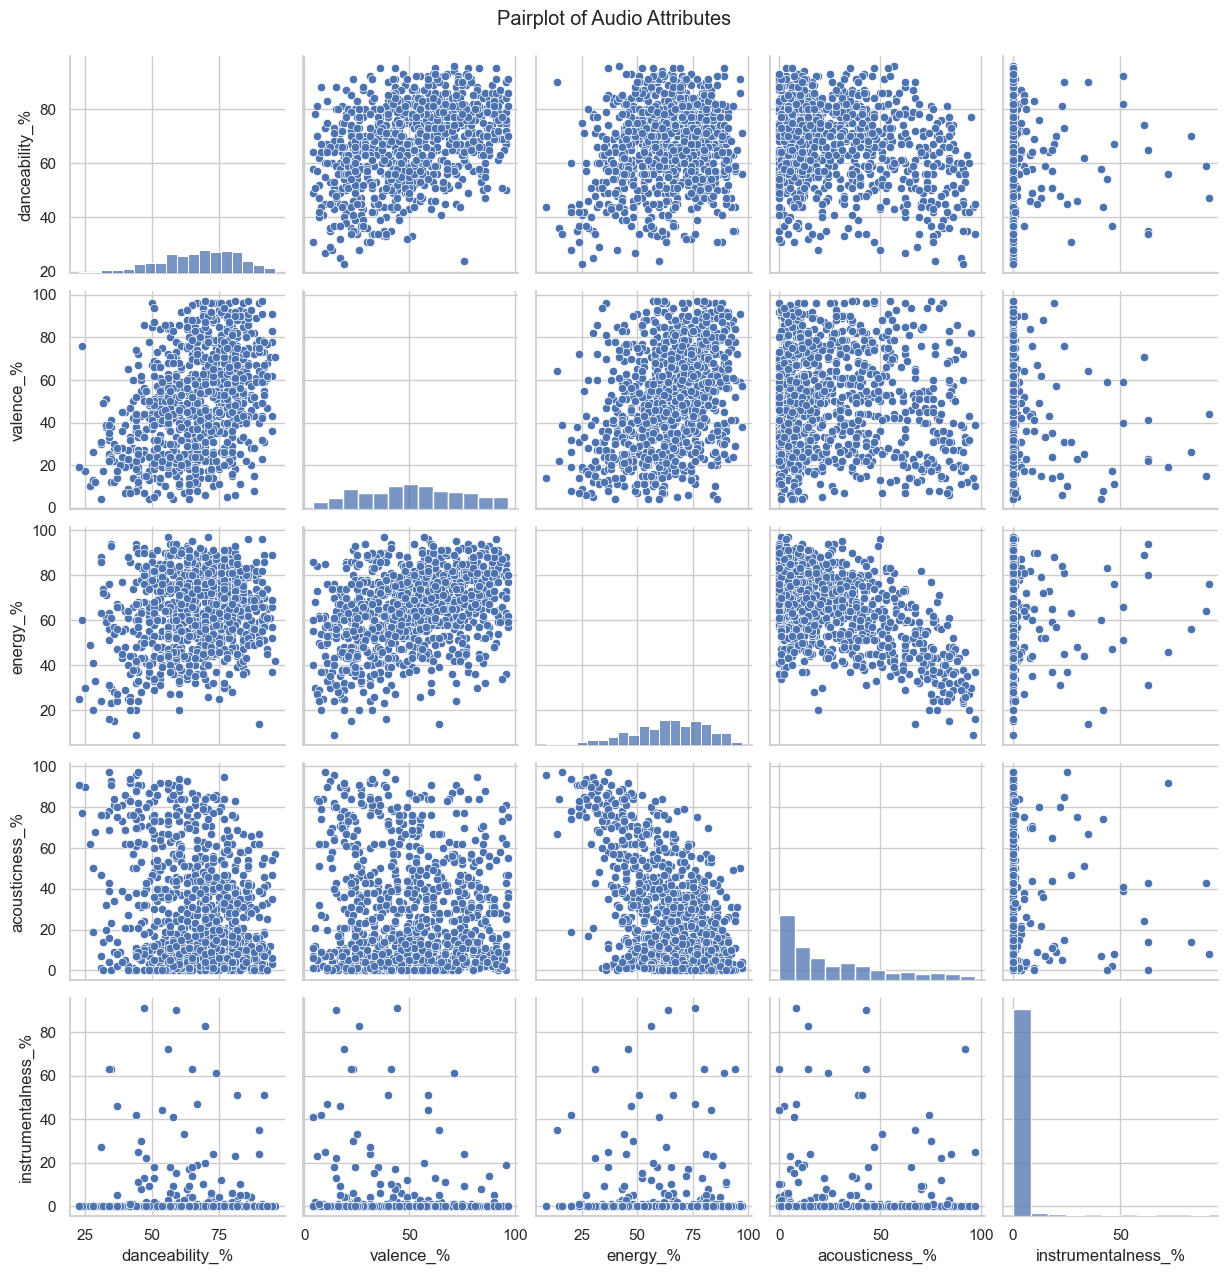

In [13]:
sns.set(style='whitegrid')
columns_to_plot = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%']
sns.pairplot(data[columns_to_plot], palette='coolwarm')
plt.suptitle('Pairplot of Audio Attributes', y=1.02)
plt.show()

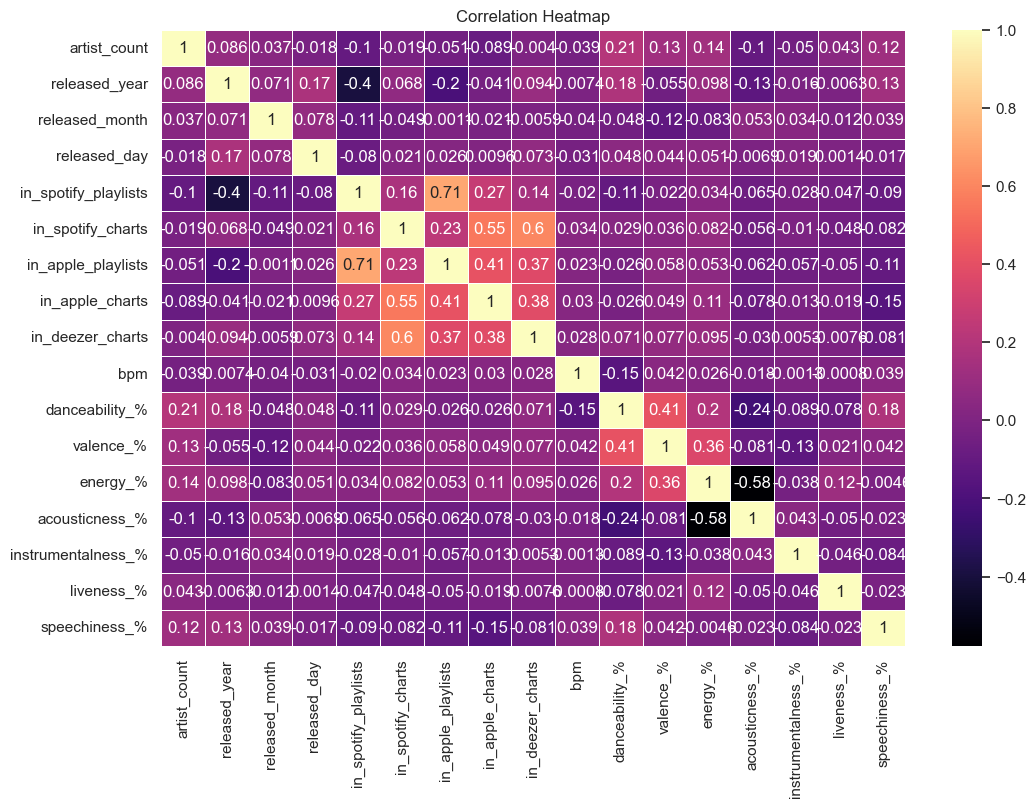

In [24]:
# Excluding non-numeric columns (e.g., song names) from the correlation analysis
numeric_data = data.select_dtypes(include=[np.number])

# Computing the correlation matrix for numeric data
corr_matrix = numeric_data.corr()

# Now you can create the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='magma', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Exploratory Data Analysis

Now, let's dig deeper into the data and uncover interesting patterns.



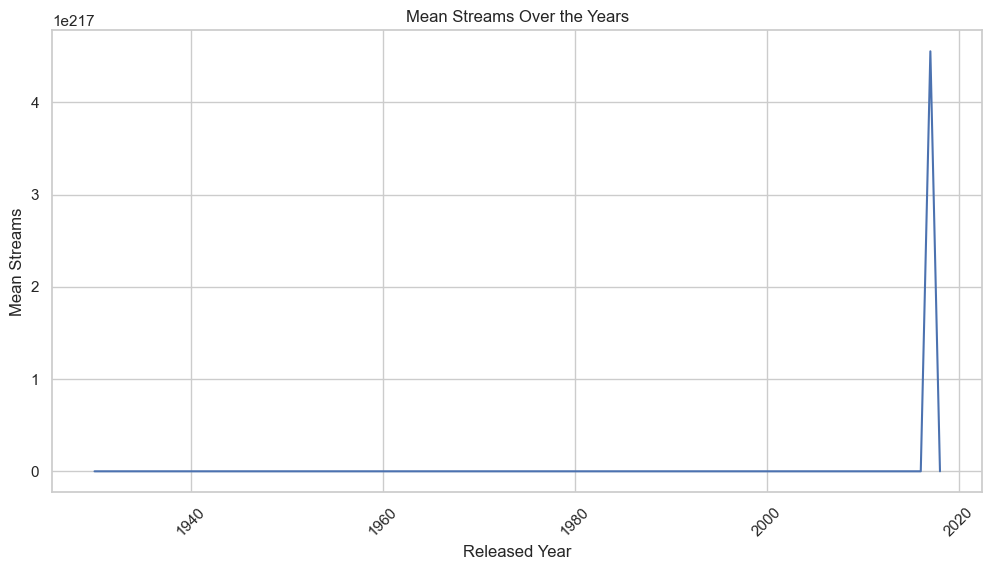

In [15]:
# Converting 'released_year' column to numeric (assuming it's originally in a string format)
data['released_year'] = data['released_year'].astype(int)

# Grouping data by released year and calculate the mean stream count
yearly_streams = data.groupby('released_year')['streams'].mean().reset_index()

# Ploting the mean stream count over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_streams, x='released_year', y='streams')
plt.xlabel('Released Year')
plt.ylabel('Mean Streams')
plt.title('Mean Streams Over the Years')
plt.xticks(rotation=45)
plt.show()

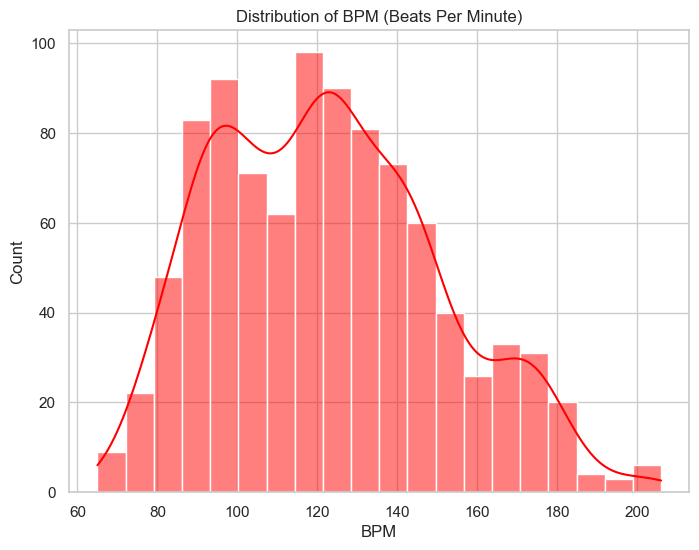

In [27]:
plt.figure(figsize=(8, 6))
sns.histplot(data['bpm'], bins=20, kde=True, color='red')
plt.title('Distribution of BPM (Beats Per Minute)')
plt.xlabel('BPM')
plt.ylabel('Count')
plt.show()

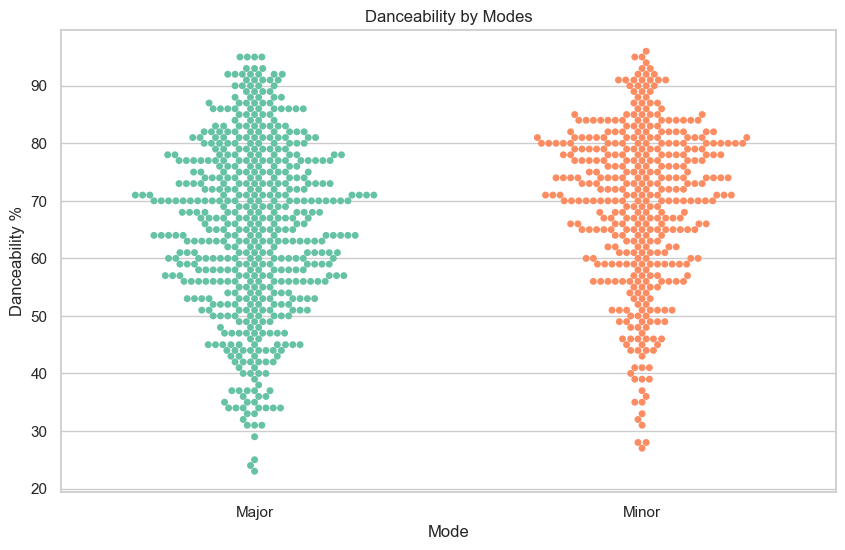

In [17]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='mode', y='danceability_%', data=data, palette='Set2')
plt.title('Danceability by Modes')
plt.xlabel('Mode')
plt.ylabel('Danceability %')
plt.show()

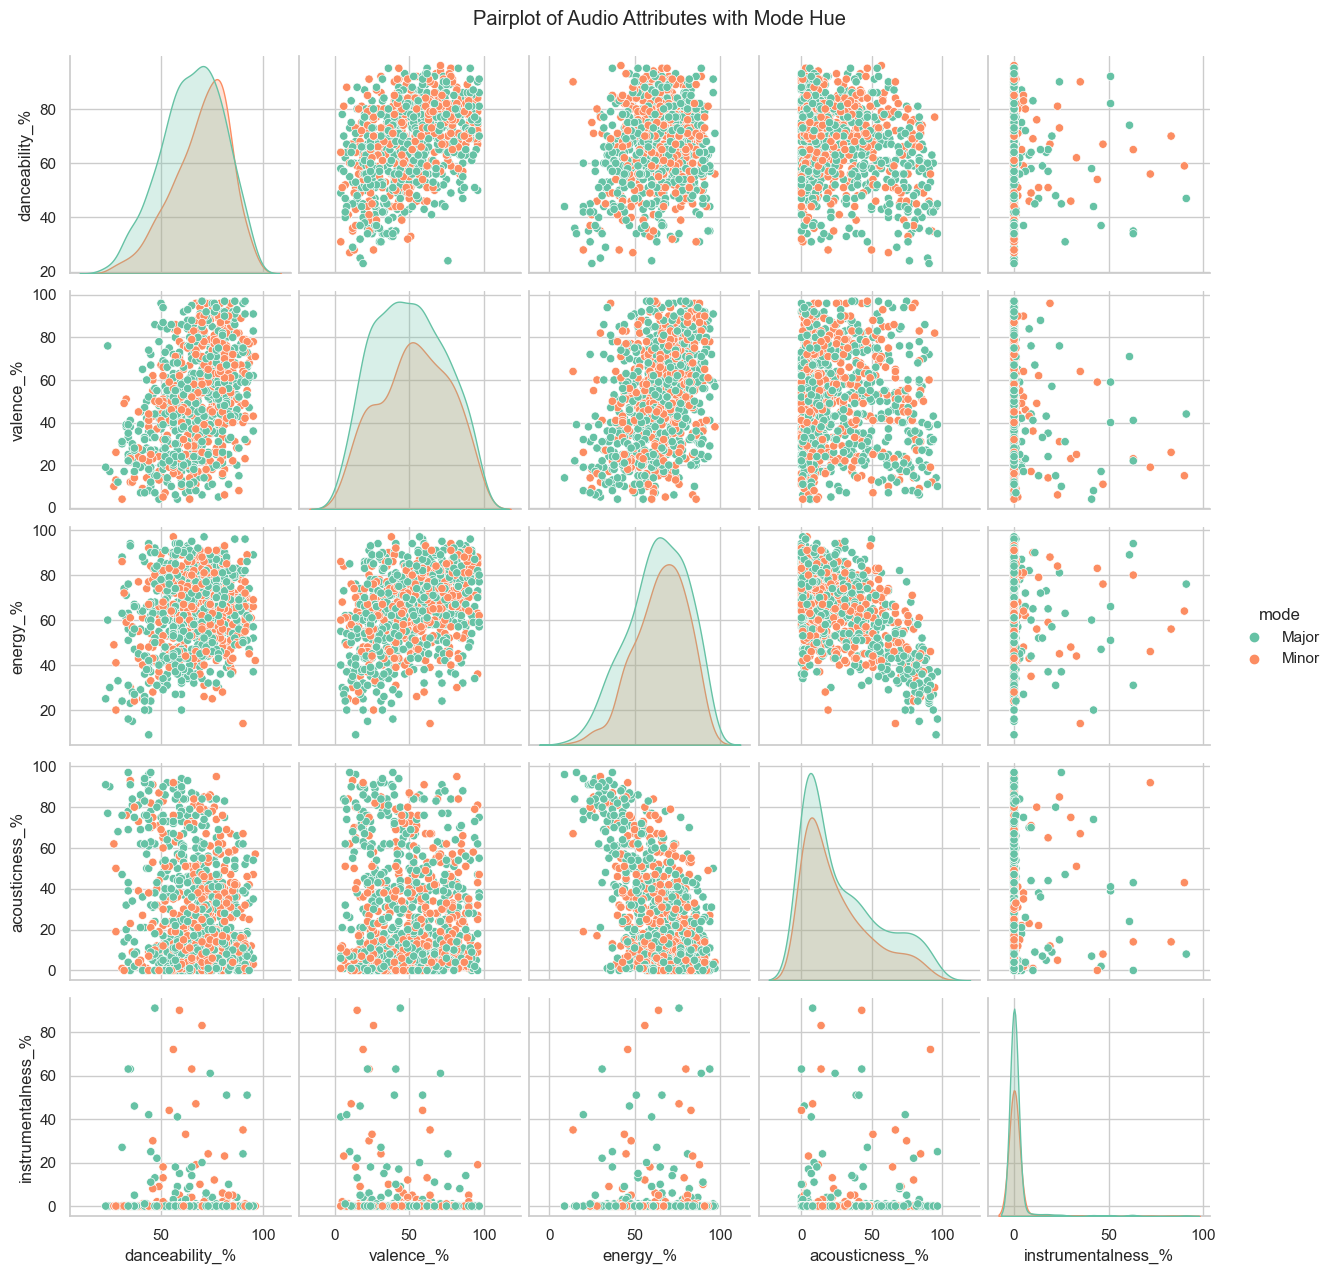

In [18]:
sns.set(style='whitegrid')
columns_to_plot = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%']
sns.pairplot(data, hue='mode', palette='Set2', vars=columns_to_plot)
plt.suptitle('Pairplot of Audio Attributes with Mode Hue', y=1.02)
plt.show()

# Predictive Modeling

Can we predict song popularity based on certain attributes? Let's build a simple predictive model.



In [19]:
# Defining the number of folds (k)
k = 5  # You can adjust this value as needed

# Defining your model
model = LinearRegression()

# Defining the input features (X) and target variable (y)
X = data[['valence_%', 'energy_%']]
y = data['streams']

# Creating a KFold cross-validation object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Performing k-fold cross-validation and calculate RMSE for each fold
rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error'))

# Printing the RMSE for each fold
for i, rmse in enumerate(rmse_scores):
    print(f'Fold {i+1} RMSE: {rmse}')

# Calculating and print the mean RMSE across all folds
mean_rmse = np.mean(rmse_scores)
print(f'Mean RMSE: {mean_rmse}')

Fold 1 RMSE: 496697156.02382857
Fold 2 RMSE: 634488856.5646199
Fold 3 RMSE: 534165914.1133219
Fold 4 RMSE: 609053517.8683727
Fold 5 RMSE: 556212167.0519145
Mean RMSE: 566123522.3244114


# Conclusion

Our exploration of music analytics has been truly insightful. We've delved into the data, highlighted key trends through visualizations, and even ventured into predicting song popularity. The potential of this dataset is vast, and we've only begun to uncover what it has to offer.